In [30]:
boundaries =[
    ([200, 15, 17], [255, 56, 50]),  #Red
    ([50, 50, 150], [88, 88, 255]),  #Blue
    ([240, 230, 0], [255, 250, 10]),#Yellow#1
    ([255, 190, 10], [255, 215, 20]),#Yellow#2
    ([100, 120, 170], [130, 165, 210]),#Silver
    ([110, 0, 5],[150, 10, 35]),#Maroon
    ([160, 200, 10],[200, 250, 40]),#Lime
    ([20, 160, 60],[50, 190, 90]),#Green                                                 
    ([200, 120, 20],[250, 160, 50]),#Orange
    ([160, 100, 50],[200, 150, 100]),#Brown
    ([230, 155, 180],[255, 190, 210]),#Pink
    ([180, 180, 220],[225, 210, 245]),#Lavendar
    ([150, 50, 150],[180, 90, 180]),#Purple
    
]

boundariescolours = [
    "Red", "Blue", "Yellow1", "Yellow2", "Silver", "Maroon", "Lime", "Green", "Orange", "Brown", "Pink", "Lavendar", "Purple"
]

In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import pylab
                                               
pic = Image.open('steve2.png')
import xlsxwriter  
width, height = pic.size

new_pic_arr = []
np.seterr(over='ignore')


{'divide': 'warn', 'over': 'ignore', 'under': 'ignore', 'invalid': 'warn'}

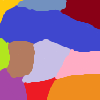

In [32]:
pic

In [33]:
pic_arr = np.asarray(pic)
new_pic_arr = pic_arr.copy()
print(pic_arr.shape)
                                                                                  
blurred = cv2.GaussianBlur(pic_arr, (5,5), 0)
lab = cv2.cvtColor(blurred, cv2.COLOR_BGR2LAB)

(100, 100, 3)


In [34]:
threshold = 40
for i in range(height):
    for j in range(width):
        current_pixel = pic_arr[i,j]
        if i < height-1 and j < width-1:
            next_pixel = pic_arr[i+1,j+1]                                      
        
        diff = [abs(int(next_pixel[0]) - int(current_pixel[0])), abs(int(next_pixel[1]) - int(current_pixel[1])), abs(int(next_pixel[2]) - int(current_pixel[2]))]
        
        if diff[0] >= threshold or diff[1] >= threshold or diff[2] >= threshold:
            new_pic_arr[i,j] = [0,0 , 0]
        else:
            new_pic_arr[i,j] = pic_arr[i,j]

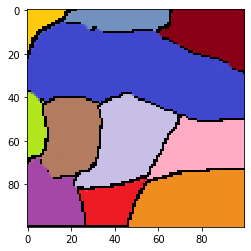

In [35]:
plt.imshow(new_pic_arr)                                                        

In [36]:
l = 0
k = 0
p = 0
black = [0,0,0]

occured = False
found = False
alreadyset = False
firstpixel =[]
secondpixel = []

colours_found = []

for (lower, upper) in boundaries:
    
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8")
    
    mask = cv2.inRange(new_pic_arr, lower, upper)
    output = cv2.bitwise_and(new_pic_arr, new_pic_arr, mask = mask)
    output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    #print(output)
    #print("newline")
    
    i = 0
    j = 0
    counter = 0
    counter2 = 0
    
    
    #--------------------find if color occurs in the image---------------#
    for i in range(height):
        for j in range(width):
            #print(output[i,j])
            comparison = output[i,j] == black
            isequal = comparison.any()
            
            if not isequal:
                if boundariescolours[l] not in colours_found:
                    colours_found = np.append(colours_found, boundariescolours[l])
    #----------------------/finding colours-------------------------------#
    #----------------------finding first pixel----------------------------#
    
    for i in range(height):
        for j in range(width):
            
            a = not(output[i,j] == black).all() 
            b = not(occured)
            
            if a and b:
                occured = True
                firstpixel = [i,j]
    
    #---------------------/finding first pixel----------------------------#
    #----------------------findmidpoint-----------------------------------#
    for i in range(height):
            for j in range(width):
                current_position = [i,j]
                if not ((output[i,j] == [0,0,0]).all()):
                    counter = counter + 1

    halfway = counter/2
    halfway = int(halfway)

    for i in range(height):
        for j in range(width):
            current_position = [i,j]
            if not ((output[i,j] == [0,0,0]).all()):
                counter2 = counter2 + 1
                if not(counter2 == halfway) :
                    midpoint = []
                else:
                    if not(found):
                        mid_point = current_position
                        print(mid_point)
                        counter2 = 0
                        found = True
     #---------------------/findmidpoint-----------------------------------#          
         
        
        
    
        
    input_img = cv2.cvtColor(pic_arr, cv2.COLOR_BGR2RGB)
    
        
    resizedIn = cv2.resize(input_img, (height * 6, width  * 6), interpolation = cv2.INTER_AREA)
    resizedOut = cv2.resize(output, (height * 6, width  * 6), interpolation = cv2.INTER_AREA)
    
    if boundariescolours[l] in colours_found:
        cv2.putText(resizedIn,boundariescolours[l], (mid_point[1]*6, mid_point[0]*6), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv2.LINE_AA)
    
    cv2.imshow("images", np.hstack([resizedIn, resizedOut]))
    
    if boundariescolours[l] in colours_found:
        print("first pixel of", boundariescolours[l], "at", firstpixel)
        print("number of", boundariescolours[l], "pixels is", counter)
    
    l = l + 1
    occured = False
    found = False
    counter = 0 
    cv2.waitKey(0)
    
    
print("These colours were found: ", colours_found)
print("There were", len(colours_found), "colours found out of the possible", len(boundariescolours))
cv2.destroyAllWindows()

[89, 30]
first pixel of Red at [78, 53]
number of Red pixels is 400
[29, 18]
first pixel of Blue at [6, 15]
number of Blue pixels is 2935
[4, 5]
first pixel of Yellow2 at [0, 0]
number of Yellow2 pixels is 144
[4, 35]
first pixel of Silver at [0, 24]
number of Silver pixels is 393
[10, 91]
first pixel of Maroon at [0, 67]
number of Maroon pixels is 747
[54, 2]
first pixel of Lime at [39, 0]
number of Lime pixels is 207
[88, 73]
first pixel of Orange at [74, 85]
number of Orange pixels is 1188
[58, 13]
first pixel of Brown at [41, 14]
number of Brown pixels is 782
[63, 88]
first pixel of Pink at [49, 71]
number of Pink pixels is 841
[59, 61]
first pixel of Lavendar at [39, 45]
number of Lavendar pixels is 1099
[87, 10]
first pixel of Purple at [69, 3]
number of Purple pixels is 587
These colours were found:  ['Red' 'Blue' 'Yellow2' 'Silver' 'Maroon' 'Lime' 'Orange' 'Brown' 'Pink'
 'Lavendar' 'Purple']
There were 11 colours found out of the possible 13
